<a href="https://colab.research.google.com/github/Blackman9t/Machine_Learning/blob/master/understanding_the_maths_of_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>This project explains in concrete terms how Simple Linear Regression really works.<br>
    It creates a better intuition for understanding  the Maths and inner workings of The Simple Linear Regression Algorithm.</h3>

<font color='khaki'>This Notebook provides the actual codes for the following medium post written by Lawrence Krukrubo.</font><br>
See link to the post published in [TowardsAI](https://medium.com/towards-artificial-intelligence/understanding-the-simple-maths-behind-simple-linear-regression-3ce4a30e7602) in medium

Kindly go through the article [here](https://medium.com/towards-artificial-intelligence/understanding-the-simple-maths-behind-simple-linear-regression-3ce4a30e7602) as you explore this notebook

We shall use the Fuel consumption ratings data set for car sales in Canada.<br>
[(Original Fuel Consumption Ratings 2000–2014)](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

See direct [link](https://drive.google.com/file/d/1Apxb-KxuagxhryXmT4UJA0U-2PgvdRer/view?usp=sharing) to the Data set

Or download it from the git repository

## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

**Double-Click** here for more info.

<!-- 

Understanding the Table										
Model	4WD/4X4 = Four-wheel drive									
	AWD = All-wheel drive									
	CNG = Compressed natural gas									
	FFV = Flexible-fuel vehicle									
	NGV = Natural gas vehicle									
	# = High output engine that provides more power than the standard engine of the same size									
Transmission	A = Automatic									
	AM = Automated manual									
	AS = Automatic with select shift									
	AV = Continuously variable									
	M = Manual									
	3 – 10 = Number of gears									
Fuel Type	X = Regular gasoline									
	Z = Premium gasoline									
	D = Diesel									
	E = Ethanol (E85)									
	N = Natural Gas									
Fuel Consumption	City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)									
CO2 Emissions (g/km)	Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

-->
										


## 1. Importing Needed Packages

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
print('imports all done')

imports all done


## 2. Let's mount gdrive in Colab.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## 3. Let's load the data set as a file and read in pandas Data frame... We can see the first 5 rows printed out.

In [0]:
file = ''
with open('/content/gdrive/My Drive/Colab_Notebooks/IBM_cognitive_class_learning/Original_2000_2014_Fuel_Consumption_Ratings.csv') as f:
    file = f.read()
    
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

Data = StringIO(file)

fuel_consumption_df = pd.read_csv(Data, sep=",")

fuel_consumption_df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY(L/100km),HWY_(L/100km),COMB_(L/100km),COMB_(mpg),CO2_EMISSIONS(g/km)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


### Let's rename a few column headers that seem too long

In [0]:
fuel_consumption_df.rename(columns={'FUEL_CONSUMPTION_CITY(L/100km)': 'FUEL_CONS_CITY(L/100km)', 'CO2_EMISSIONS(g/km)':'CO2_EMISSIONS'}, inplace=True)

## 4. Let's check the number of rows and cols

In [0]:
fuel_consumption_df.shape

(14343, 13)

## 5. Let's confirm our data set columns have the right data types

In [0]:
fuel_consumption_df.dtypes

MODEL_YEAR                   int64
MAKE                        object
MODEL                       object
VEHICLE_CLASS               object
ENGINE_SIZE(L)             float64
CYLINDERS                    int64
TRANSMISSION                object
FUEL_TYPE                   object
FUEL_CONS_CITY(L/100km)    float64
HWY_(L/100km)              float64
COMB_(L/100km)             float64
COMB_(mpg)                   int64
CO2_EMISSIONS                int64
dtype: object

## 6. Let's check for NaN Values

In [0]:
fuel_consumption_df.isna().sum()

MODEL_YEAR                 0
MAKE                       0
MODEL                      0
VEHICLE_CLASS              0
ENGINE_SIZE(L)             0
CYLINDERS                  0
TRANSMISSION               0
FUEL_TYPE                  0
FUEL_CONS_CITY(L/100km)    0
HWY_(L/100km)              0
COMB_(L/100km)             0
COMB_(mpg)                 0
CO2_EMISSIONS              0
dtype: int64

## 7. Let's plot the Correlation Using a Heat map from seaborn library

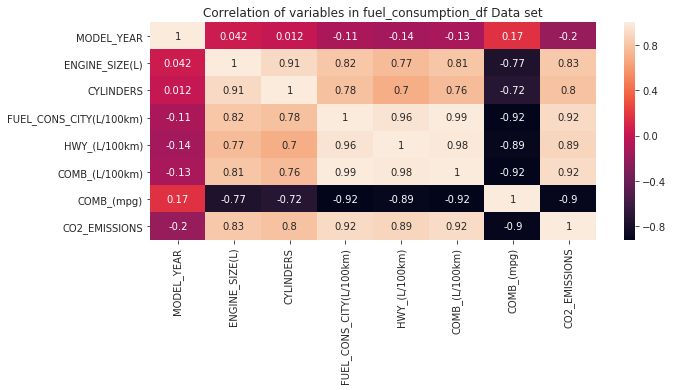

In [0]:
corr_data = fuel_consumption_df.corr()

plt.figure(figsize=(10,4))
sns.set_style('ticks')
sns.heatmap(corr_data, annot=True)
plt.title('Correlation of variables in fuel_consumption_df Data set')
plt.show()

## Plotting 3 Scatter Plots of Top Correlated Variables

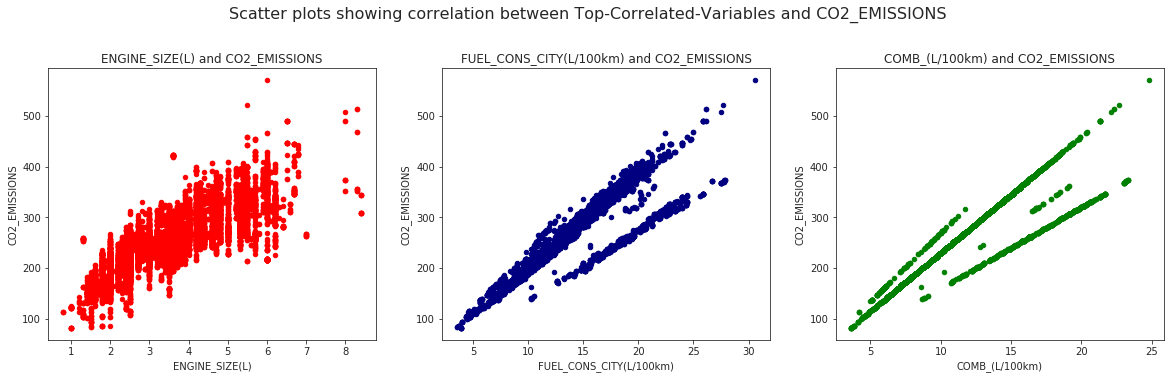

In [0]:
fig = plt.figure(figsize=(20, 5))
plt.suptitle('Scatter plots showing correlation between Top-Correlated-Variables and CO2_EMISSIONS', y=1.05, fontsize=16)

ax = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

# Subplot 1 scatter plot of ENGINE_SIZE and Co2_EMISSIONS
fuel_consumption_df.plot(kind='scatter', x='ENGINE_SIZE(L)', y='CO2_EMISSIONS', color='red', ax=ax)
ax.set_title('ENGINE_SIZE(L) and CO2_EMISSIONS')
ax.set_xlabel('ENGINE_SIZE(L)')
ax.set_ylabel('CO2_EMISSIONS')

# Subplot 2 scatter plot of FUEL_CONS_CITY(L/100km) and Co2_EMISSIONS
fuel_consumption_df.plot(kind='scatter', x='FUEL_CONS_CITY(L/100km)', y='CO2_EMISSIONS', color='navy', ax=ax1)
ax1.set_title('FUEL_CONS_CITY(L/100km) and CO2_EMISSIONS')
ax1.set_xlabel('FUEL_CONS_CITY(L/100km)')
ax1.set_ylabel('CO2_EMISSIONS')

# Subplot 3 scatter plot of COMB_(L/100km) and Co2_EMISSIONS
fuel_consumption_df.plot(kind='scatter', x='COMB_(L/100km)', y='CO2_EMISSIONS', color='green', ax=ax2)
ax2.set_title('COMB_(L/100km) and CO2_EMISSIONS')
ax2.set_xlabel('COMB_(L/100km)')
ax2.set_ylabel('CO2_EMISSIONS')

plt.show()

## The Slope Formula for Simple Linear Regression

#<font color='khaki'>$b_1$ = $\frac{Σ^n_{i=1}(x_i-\:\bar{x}) (y_i-\:\bar{y})}{Σ^n_{i=1}\:{(x_i-\:\bar{x})}^2 }$</font>

## let's define our $x, x_{bar}, y\:$and $\:y_{bar}$ variables

In [0]:
# The predictor or independent variable x is Engine_Size
x = fuel_consumption_df['ENGINE_SIZE(L)']

# The mean or average of x is x_bar
x_bar = x.mean()

# The target or dependent variable y is Co2_Emissions
y = fuel_consumption_df['CO2_EMISSIONS']

# The mean or average of y is y_bar
y_bar = y.mean()


In [0]:
print('x_bar or average of x is',x_bar,'\ny_bar or average of y is',y_bar)


x_bar or average of x is 3.4743080248204476 
y_bar or average of y is 248.53078156592065


## Let's define a simple method that calculates b1 or slope.

In [0]:
def calc_slope(feature, target, x_bar, y_bar):
    """ takes two series objects- feature and target and their averages x_bar and y_bar
    performs the slope equation on each combine variables of feature and target,
    then finally returns a floating point number as theta one or b_one,
    Which is also known as the gradient or slope of the linear regression"""

    numerator = 0
    denominator = 0
    for i, j in zip(feature, target):
        numerator+= (i - x_bar) * (j - y_bar)
        denominator+= (i - x_bar)**2
    return round((numerator / denominator),8)


In [0]:
b1 = calc_slope(x, y, x_bar, y_bar)
b1

37.28016592

## Let's substitute value of b1 into the SLR equation:-  y =b0 + bixi, inorder to find b0.

Remember that this SLR equation (y = b0 + bixi) is identical to the slope intercept equation (y = b + mx). <br>Therefore we can use any given value of y and x that we know and substitute the slope (b1) into the equation, to get the y_intercept or b0

### Let's use the average value of y as our y value and average value of x as our x value for the equation

<h2>
$y = b0 + b1x1$<br>
Therefore:<br>
$y_{bar} = b0 + b1x_{bar}$<br>

Let's solve for $b0$<br>

Therefore:<br>
$b0 + b1x_{bar} = y_{bar}$<br>

Which is same as:<br>
$b0 = y_{bar} - b1x_{bar}$</h2>

### Let's input the values of <h2>$y_{bar},b1\:and\:x_{bar}$</h2> to get the value of </h2>$b0$

## Solving for $b0$ by substituting $b1$ in the equation. given $x_{bar}\:and\:y_{bar}$

In [0]:
b0 = y_bar - (b1 * x_bar)

# Lets round b0 to 8 D.P as is the corm
b0 = round(b0, 8)

b0

119.00800194

## Therefore our ideal values of b0 and b1 for the best SLR model are:

### $b0$ = 119.00800194

### $b1$ = 37.28016592


### Remember a model is a mathematical equation used to Predict a value, given one or more other values.
### This means the Simple Linear Regression model for Engine_Size and Co2_Emissions is:-<br>

##$y = b0 + bixi$

###which we can write as the following, by substituting values for our model

##<font color='khaki'>$y_{hat} = 119.00800194 + (37.28016592)x1$</font>


<h3>So if we want to predict the Co2_Emission of a car with engine size 13.5 Litres for example<br>
All we need to do is plug in 13.5 as value for $x1$ in our SLR equation.

In [0]:
co2_13_point_5_litre_engine = round(b0 + (b1*13.5))  # rounding the prediction to a whole number like in the data set

co2_13_point_5_litre_engine

622

## let's plot our line or best fit, aka our SLR model below

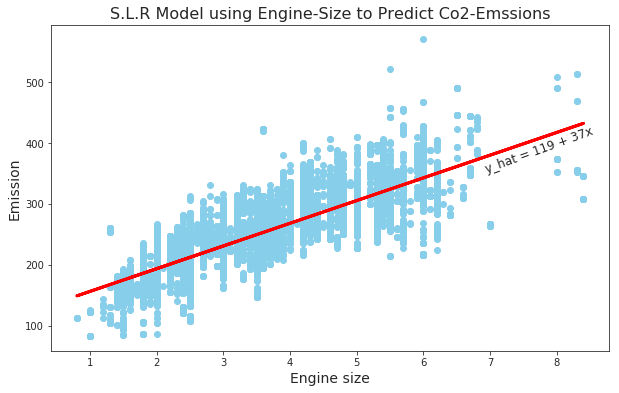

In [0]:
plt.figure(figsize=(10,6))

plt.scatter(x, y,  color='skyblue')
plt.plot(x, b1*x + b0, '-r', linewidth=3)
plt.annotate("y_hat = {} + {}x".format(round(b0), round(b1)), xy=(6.9,415),rotation=20, fontsize=12)
plt.title('S.L.R Model using Engine-Size to Predict Co2-Emssions', fontsize=16)
plt.xlabel("Engine size", fontsize=14)
plt.ylabel("Emission", fontsize=14)
plt.show()

### Let's make a prediction with our Mathematics Model

In [0]:
y_hat = round(x * b1 + b0)  # substituting the values of b0 and b1 to perform Model prediction

y_hat[:5]

0    179.0
1    179.0
2    238.0
3    249.0
4    186.0
Name: ENGINE_SIZE(L), dtype: float64

### Let's define a simple method that can calculate The MSE of our model

In [0]:
def calc_MSE(y_hat, y):
    """ takes two series objects- y_hat and y and computes the sum of
    squared differences between each corresponding value of y_hat and y,
    and divides this sum by total number of observations in y."""

    numerator = 0
    denominator = len(y)
    for i, j in zip(y_hat, y):
        numerator+= (i - j)**2
    return (numerator / denominator)

### let's compute the MSE

In [0]:
MSE = calc_MSE(y_hat, y)
MSE

1110.043854144879

### Let's also compute the RMSE which is the square root of The MSE

In [0]:
RMSE = MSE**0.5
RMSE

33.31732063274115

## Using Scikit Learn library to verify the values of $b1, b0$ and  MSE 

### first we import linearRegresion from sklearn linear_model

In [0]:
# first we import Linear regression model from sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Next we instantiate a linear regression model using the constructor

In [0]:
model = LinearRegression()

### next we  define the feature and target variables, converting $x$ and $y$ into a 2D array

In [0]:
X = fuel_consumption_df[['ENGINE_SIZE(L)']].values

Y = fuel_consumption_df[['CO2_EMISSIONS']].values

### Next we train the model using the fit function

In [0]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Let's print out the $b0\:and\:b1$ values from our model

In [0]:
slope = model.coef_

slope

array([[37.28016592]])

In [0]:
intercept = model.intercept_

intercept

array([119.00800194])

### we can see that The Maths Model and Sklearn Model have the exact same value for b0 and b1

In [0]:
print('The Mathematical Slope is:', b1)
print('The Scikit Learn Slope is:', slope)
print('The Mathematical Intercept is:', b0)
print('The Scikit Learn Intercept is:', intercept)



The Mathematical Slope is: 37.28016592
The Scikit Learn Slope is: [[37.28016592]]
The Mathematical Intercept is: 119.00800194
The Scikit Learn Intercept is: [119.00800194]


### let's use our Sklearn model to once again predict a car's Co2 Emission with engine size 13.5 litres

In [0]:
new_car_engine = [[13.5]]

In [0]:
new_car_co2 = np.round(model.predict(new_car_engine))

new_car_co2

array([[622.]])

### Let's predict the dependent variable X, with the new Model

In [0]:
predict = model.predict(X)

### Let's find The MSE and RMSE of The new Model

In [0]:
model_MSE = mean_squared_error(predict, Y)

model_MSE

1109.707317631954

In [0]:
model_RMSE = model_MSE**0.5

model_RMSE

33.312269776044296

### onece again both models have the same MSE and RMSE

In [0]:
print('The Mathematical MSE is:', round(MSE))
print('The Scikit Learn MSE is:', np.round(model_MSE))
print('The Mathematical RMSE is:', round(RMSE))
print('The Scikit Learn RMSE is:', np.round(model_RMSE))



The Mathematical MSE is: 1110
The Scikit Learn MSE is: 1110.0
The Mathematical RMSE is: 33
The Scikit Learn RMSE is: 33.0


## let's plot our line or best fit, aka our SLR models for both Maths and Sklearn Library

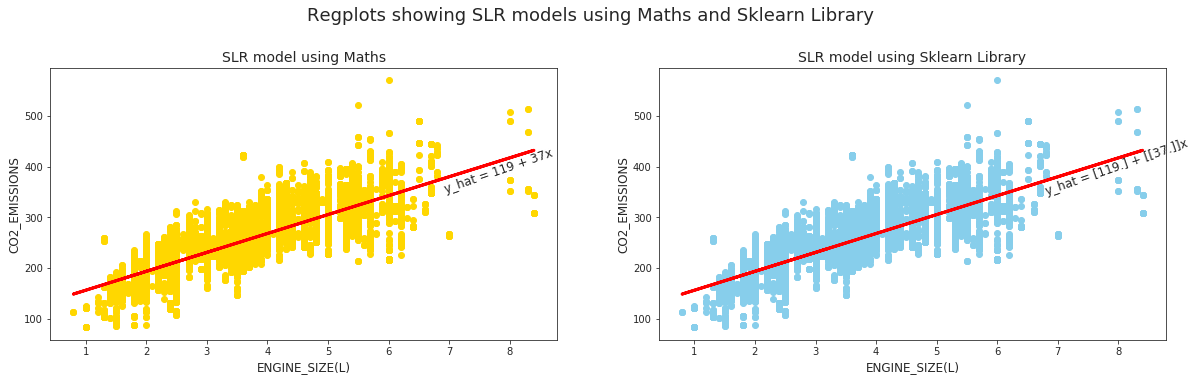

In [0]:
fig = plt.figure(figsize=(20, 5))
plt.suptitle('Regplots showing SLR models using Maths and Sklearn Library', y=1.05, fontsize=18)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# Subplot 1 scatter plot of ENGINE_SIZE and Co2_EMISSIONS
ax.scatter(x= x, y=y, color='gold', data=fuel_consumption_df)
ax.plot(x, b1*x + b0, '-r', linewidth=3, color='red')
ax.annotate("y_hat = {} + {}x".format(round(b0), round(b1)), xy=(6.9,420),rotation=19, fontsize=12)
ax.set_title('SLR model using Maths', fontsize=14)
ax.set_xlabel('ENGINE_SIZE(L)', fontsize=12)
ax.set_ylabel('CO2_EMISSIONS', fontsize=12)

# Subplot 2 scatter plot of FUEL_CONS_CITY(L/100km) and Co2_EMISSIONS
ax1.scatter(x= x, y=y, color='skyblue', data=fuel_consumption_df)
ax1.plot(x, slope[0]*x + intercept, '-r', linewidth=3, color='red')
ax1.annotate("y_hat = {} + {}x".format(np.round(intercept), np.round(slope)), xy=(6.77,440),rotation=19, fontsize=12)
ax1.set_title('SLR model using Sklearn Library', fontsize=14)
ax1.set_xlabel('ENGINE_SIZE(L)', fontsize=12)
ax1.set_ylabel('CO2_EMISSIONS', fontsize=12)

plt.show()

## Determining the implication of the RMSE 

###  First we find the range of the dependent variable(C02_Emissions)

In [0]:

y_range = fuel_consumption_df['CO2_EMISSIONS'].max() - fuel_consumption_df['CO2_EMISSIONS'].min() 

y_range


487

### Next we compute RMSE as a percentage of the range

In [0]:
error_margin = (RMSE / y_range) * 100

error_margin


6.841338938961222

<h3>Therefore, with an RMSE of 33, our model error margin is just within 6.84% of the range(487) of the dependent variable(CO2_Emissions)… <br>
    Which means our SLR Model as simple as it is, is doing pretty good.

### Let's see how confident our model is on each prediction

In [0]:
from sklearn.metrics import r2_score

r2_score(Y, predict)

0.682739618739501